### **PA 2**

#### **Course:** ECE Elective 1 Emerging Technologies
#### **Program:** BS ECE

* *Al-Hajri, Sarah Bint Mubarak F.*
* *Camonias, Elizhea C.*
* *Orpilla, Sigmund Yona Marie A.*

---

---

# **Programming Assignment 2: Linear Regression**

In this assignment, you will train a model using Linear Regression. Go to
https://archive.ics.uci.edu/ml/datasets/Energy+efficiency and download the Energy Efficiency dataset. The dataset contains 768 samples of simulated buildings with 8 attributes (X1 to X8) and two targets (Y1 and Y2). The following are their meanings:

X1 Relative Compactness \\
X2 Surface Area  \\
X3 Wall Area \\
X4 Roof Area \\
X5 Overall Height \\
X6 Orientation \\
X7 Glazing Area \\
X8 Glazing Area Distribution \\
y1 Heating Load \\
y2 Cooling Load \\

The predictive model for heating and cooling loads of these buildings are useful for analyzing their
energy consumption, in particular, in cold countries. In this programming assignment, the goal is to predict the heating load only

---
### **General Guidelines**
1. Split the samples into 60% training, 20% validation, and 20% testing data at random  
2. Using Ridge regularization, set your own 10 different choices of regularization parameters, find
the best choice that gives the highest accuracy on the validation data (based on R2)
3. Make one final evaluation on the test data
4. What are the best model’s coefficients, intercept, and its training, validation, and test accuracy?
5. What are the top 5 features among X1 to X8?
6. If you repeat the procedure above using only the 5 top features, what are the results?


---
####**Contents:**
1. [Data Partitioning: Splitting the Dataset](https://colab.research.google.com/drive/1d7FyML8vh-JtJFAeUtWmrdSTYILj7qJp#scrollTo=6z_yd_KSidzZ)
2. [Optimizing Ridge Parameters](https://colab.research.google.com/drive/1d7FyML8vh-JtJFAeUtWmrdSTYILj7qJp#scrollTo=7v76vbPG7yU-)
3. [Model Evaluation](https://colab.research.google.com/drive/1d7FyML8vh-JtJFAeUtWmrdSTYILj7qJp#scrollTo=gK1MnsKBan6w)
4. [Analyzing Model Performance](https://colab.research.google.com/drive/1d7FyML8vh-JtJFAeUtWmrdSTYILj7qJp#scrollTo=ZnpAiiRMbD0w)
5. [Feature Importance: Identifying Top Predictors](https://colab.research.google.com/drive/1d7FyML8vh-JtJFAeUtWmrdSTYILj7qJp#scrollTo=koRsTPy0hDaJ)
6. [Reduced Feature Model: Results with Top 5 Predictors](https://colab.research.google.com/drive/1d7FyML8vh-JtJFAeUtWmrdSTYILj7qJp#scrollTo=_ijctdHjhLet)
7. [Guide Questions](https://colab.research.google.com/drive/1d7FyML8vh-JtJFAeUtWmrdSTYILj7qJp#scrollTo=YDqulUmOCOjn)
8. [Summary](https://colab.research.google.com/drive/1d7FyML8vh-JtJFAeUtWmrdSTYILj7qJp#scrollTo=ec5v1P3-eKhA)
9. [Key Insights](https://colab.research.google.com/drive/1d7FyML8vh-JtJFAeUtWmrdSTYILj7qJp#scrollTo=3wiUt36D0ol4v)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importing Necessary Libraries**






Import necessary libraries

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# **Importing Dataset**

In [ ]:
# fetch dataset
energy_efficiency = fetch_ucirepo(id=242)

# data (as pandas dataframes)
X = energy_efficiency.data.features
y = energy_efficiency.data.targets

df = pd.concat([X, pd.DataFrame(y, columns=["Y1"])], axis=1) #Y1 - Heating Load

# metadata
print(energy_efficiency.metadata)

# variable information
print(energy_efficiency.variables)


{'uci_id': 242, 'name': 'Energy Efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'ID': 379, 'type': 'NATIVE', 'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine 

In [ ]:
display(df.head())

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [ ]:
display(df.corr(numeric_only=True))

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368
Y1,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000


####Observations:
##### Strong Negative Correlations:


*   X1 and X2: Correlation = -0.9919

  -High negative correlation, meaning as X1 increases, X2 tends to decrease strongly and vice versa.
*X4 and X5: Correlation = -0.9725

  -Indicates a strong inverse relationship.


#####Strong Positive Correlations:

*   X4 and X2: Correlation = 0.8807

  -These variables tend to increase together.
* X5 and Y1: Correlation = 0.8894
  
  -Indicates that X5 (Overall Height) is highly positively correlated with the target variable Y1 (Heating Load).

#####Weak/Negligible Correlations:

*   X6 and Y1: Correlation = -0.0026

  -Suggests that X6 (Orientation) has virtually no linear relationship with Y1.
  
#####Target Variable (Y1):
*Y1 is most positively correlated with:*

*   X5: 0.8894 (high correlation, significant feature).
*   X1: 0.6223 (moderate positive correlation).

*Y1 is most negatively correlated with:*
*   X4: -0.8618 (strong negative correlation).
*   X2: -0.6581 (moderate negative correlation).

# 1. Split the samples into 60% training, 20% validation, and 20% testing data at random


In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42) # Splits the original dataset into two parts:
                                                                                          # 60% for training and 40% for further splitting into
                                                                                          # validation and testing.

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42) # splits the 40% of `temp_data` into 20% for the
                                                                                                # validation and the other 20% for testing.

#  2. Using Ridge regularization, set your own 10 different choices of regularization parameters, find the best choice that gives the highest accuracy on the validation data (based on R2)

In [ ]:
alphas = np.linspace(0.1, 1.0, 10)
results = []

# Train and evaluate the model for different alphas
for alpha in alphas:
    model_ridge = Ridge(alpha=alpha)
    model_ridge.fit(X_train, y_train)

    # Predict on both training and validation sets
    y_train_pred = model_ridge.predict(X_train)
    y_val_pred = model_ridge.predict(X_val)

    # Calculate R² for both training and validation sets
    R2_train = model_ridge.score(X_train, y_train)
    R2_val = model_ridge.score(X_val, y_val)

    # Store results in the list
    results.append({
        'Alpha': round(alpha, 2),
        'R2_Train': R2_train,
        'R2_Val': R2_val,
    })

# Convert results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the resulting table
print("Ridge Regression Results:")
print(results_df)

# Identify the alpha with the highest R² on validation data
best_alpha_row = results_df.loc[results_df['R2_Val'].idxmax()]
best_alpha = best_alpha_row['Alpha']

# Train the best Ridge regression model
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train, y_train)

# Report the best alpha and corresponding R²
print(f"\nBest Alpha = {best_alpha}")
print(f"Best R² on Validation Set = {best_alpha_row['R2_Val']}")

Ridge Regression Results:
   Alpha  R2_Train    R2_Val
0    0.1  0.898529  0.903281
1    0.2  0.897581  0.901902
2    0.3  0.897097  0.901255
3    0.4  0.896782  0.900871
4    0.5  0.896544  0.900606
5    0.6  0.896343  0.900400
6    0.7  0.896161  0.900228
7    0.8  0.895989  0.900073
8    0.9  0.895820  0.899929
9    1.0  0.895653  0.899789

Best Alpha = 0.1
Best R² on Validation Set = 0.903281351006459


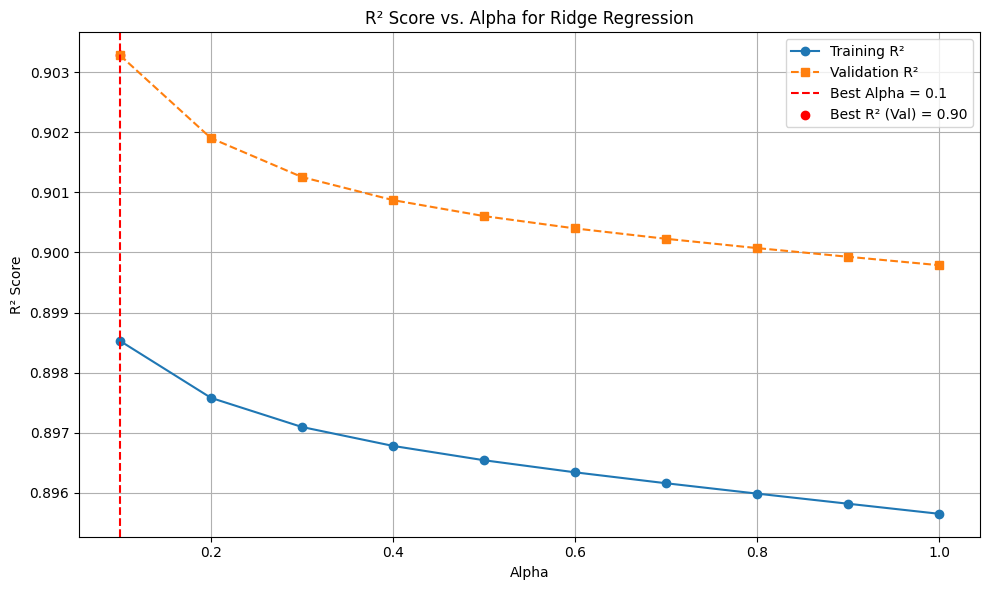

In [ ]:
# Plot R² scores for training and validation sets
plt.figure(figsize=(10, 6))

# Plot Training R²
plt.plot(results_df['Alpha'], results_df['R2_Train'], label='Training R²', marker='o', linestyle='-')

# Plot Validation R²
plt.plot(results_df['Alpha'], results_df['R2_Val'], label='Validation R²', marker='s', linestyle='--')

# Add labels, title, and legend
plt.xlabel('Alpha')
plt.ylabel('R² Score')
plt.title('R² Score vs. Alpha for Ridge Regression')
plt.legend()
plt.grid(True)

# Highlight the best alpha
best_alpha = results_df.loc[results_df['R2_Val'].idxmax()]['Alpha']
best_r2_val = results_df.loc[results_df['R2_Val'].idxmax()]['R2_Val']

plt.axvline(x=best_alpha, color='r', linestyle='--', label=f'Best Alpha = {best_alpha}')
plt.scatter(best_alpha, best_r2_val, color='red', label=f'Best R² (Val) = {best_r2_val:.2f}')

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()

# 3. Make one final evaluation on the test data

In [ ]:
# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
R2_test = best_model.score(X_test, y_test)  # Compute R² directly

# Compute additional performance metrics
mse_ridge = mean_squared_error(y_test, y_test_pred)
nmse_ridge = mse_ridge / np.var(y_test.to_numpy())  # Ensure variance is a scalar

# Print the results
print("Final Evaluation on Test Data (Best Ridge Regression Model):")
print(f"Test R²: {R2_test:.4f}")
print(f"MSE: {mse_ridge:.4f}")
print(f"NMSE: {nmse_ridge:.4f}")


Final Evaluation on Test Data (Best Ridge Regression Model):
Test R²: 0.8976
MSE: 9.7422
NMSE: 0.1001


In [ ]:
def evaluate_on_test(X_train, y_train, X_test, y_test, alphas):
    results = []
    for alpha in alphas:
        # Train the model
        model_ridge = Ridge(alpha=alpha)
        model_ridge.fit(X_train, y_train)

        # Predict on test data
        y_test_pred = model_ridge.predict(X_test)

        # Compute performance metrics
        R2_test = model_ridge.score(X_test, y_test)  # R²
        mse_test = mean_squared_error(y_test, y_test_pred)  # MSE
        nmse_test = mse_test / np.var(y_test.to_numpy())  # NMSE (normalized MSE)

        # Store the results for this alpha
        results.append({
            'Alpha': alpha,
            'R²': R2_test,
            'MSE': mse_test,
            'NMSE': nmse_test
        })

    # Convert results to a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

# Specify the alphas to evaluate
alphas = np.linspace(0.1, 1.0, 10)  # 10 values between 0.1 and 1.0

# Evaluate Ridge regression on test data for different alphas
results_df = evaluate_on_test(X_train, y_train, X_test, y_test, alphas)

# Display the results
print("Ridge Regression Results on Test Data (Different Alphas):")
print(results_df)

best_alpha_row = results_df.loc[results_df['R²'].idxmax()]
print(f"\nBest Alpha = {best_alpha_row['Alpha']}")


Ridge Regression Results on Test Data (Different Alphas):
   Alpha        R²       MSE      NMSE
0    0.1  0.897618  9.742213  0.100070
1    0.2  0.896981  9.802840  0.100693
2    0.3  0.896680  9.831435  0.100987
3    0.4  0.896503  9.848104  0.101158
4    0.5  0.896381  9.859579  0.101276
5    0.6  0.896284  9.868647  0.101369
6    0.7  0.896199  9.876636  0.101451
7    0.8  0.896118  9.884243  0.101529
8    0.9  0.896037  9.891850  0.101607
9    1.0  0.895954  9.899679  0.101688

Best Alpha = 0.1


# 4. What are the best model’s coefficients, intercept, and its training, validation, and test accuracy?

In [ ]:
# Reshape coefficients for Heating Load
coefficients = best_model.coef_  # Get the coefficients from the best model
coefficients_heating = coefficients[0]  # Coefficients for Heating Load

# Create a DataFrame to display coefficients for Heating Load
coefficients_df = pd.DataFrame({
    'Feature': X.columns,  # Feature names
    'Coefficient': coefficients_heating  # Coefficients for Heating Load
})

# Display the coefficients for Heating Load
print("\nBest Model - Coefficients for Heating Load:")
print(coefficients_df.to_string(index=False))

# Intercept for Heating Load
print(f"\nIntercept for Heating Load: {best_model.intercept_[0]:.4f}")

# Model Performance Metrics
print("\nModel Performance:")
print(f"Training R²: {R2_train:.4f}")
print(f"Validation R²: {R2_val:.4f}")
print(f"Test R²: {R2_test:.4f}")



Best Model - Coefficients for Heating Load:
Feature  Coefficient
     X1   -19.811189
     X2    -0.006735
     X3     0.035394
     X4    -0.021064
     X5     4.995538
     X6    -0.013824
     X7    20.178119
     X8     0.247527

Intercept for Heating Load: 2.6858

Model Performance:
Training R²: 0.8957
Validation R²: 0.8998
Test R²: 0.8976


# 5. What are the top 5 features among X1 to X8?

In [ ]:
# Get absolute value of coefficients for Heating Load
coefficients_heating = coefficients[0]  # Coefficients for Heating Load

# Create a DataFrame with feature names and their corresponding coefficients
coefficients_df = pd.DataFrame({
    'Feature': X.columns,  # Feature names
    'Coefficient': coefficients_heating  # Coefficients for Heating Load
})

# Sort the DataFrame by the absolute value of the coefficients, in descending order
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df_sorted = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False)

# Get the top 5 features
top_5_features = coefficients_df_sorted.head(5)

# Display the top 5 features
print("\nTop 5 Features for Heating Load Prediction:")
print(top_5_features[['Feature', 'Coefficient']].to_string(index=False))



Top 5 Features for Heating Load Prediction:
Feature  Coefficient
     X7    20.178119
     X1   -19.811189
     X5     4.995538
     X8     0.247527
     X3     0.035394


# 6. If you repeat the procedure above using only the 5 top features, what are the results?

Select the top 5 features

In [ ]:
top_5_features = coefficients_df_sorted.head(5)['Feature'].tolist()

Create new datasets using only the top 5 features

In [ ]:
X_top_5 = X[top_5_features]


Split the dataset into training, validation, and test sets

In [ ]:
X_train_top_5, X_temp_top_5, y_train, y_temp = train_test_split(X_top_5, y, test_size=0.4, random_state=42)  # 60% training data
X_val_top_5, X_test_top_5, y_val, y_test = train_test_split(X_temp_top_5, y_temp, test_size=0.5, random_state=42)  # Split remaining data 50/50 for validation and test


alpha

In [ ]:
alphas = np.linspace(0.1, 1.0, 10)

# Initialize variables to store results
best_alpha = None
best_r2_val = -np.inf
best_model = None
results = []

Train a Ridge Regression model with the top 5 features

In [ ]:
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train_top_5, y_train)

    # Evaluate on training, validation, and test sets
    R2_train = model.score(X_train_top_5, y_train)
    R2_val = model.score(X_val_top_5, y_val)
    R2_test = model.score(X_test_top_5, y_test)

    # Store results for each alpha
    results.append({
        'Alpha': alpha,
        'Training R²': R2_train,
        'Validation R²': R2_val,
        'Test R²': R2_test
    })

    # Update best model if this alpha gives better validation R²
    if R2_val > best_r2_val:
        best_r2_val = R2_val
        best_alpha = alpha
        best_model = model

In [ ]:
results_df = pd.DataFrame(results)

Evaluate the model on the training, validation, and test sets

In [ ]:
print("\nModel Performance for Different Alphas with Top 5 Features:")
display(results_df)

print(f"\nBest Alpha: {best_alpha}")
print("Best Model Performance:")
print(f"Training R²: {best_model.score(X_train_top_5, y_train):.4f}")
print(f"Validation R²: {best_model.score(X_val_top_5, y_val):.4f}")
print(f"Test R²: {best_model.score(X_test_top_5, y_test):.4f}")


Model Performance for Different Alphas with Top 5 Features:


,Alpha,Training R²,Validation R²,Test R²
0,0.1,0.897643,0.902141,0.896635
1,0.2,0.897442,0.901676,0.896681
2,0.3,0.897204,0.901249,0.896651
3,0.4,0.896953,0.900863,0.896582
4,0.5,0.896700,0.900513,0.896492
5,0.6,0.896450,0.900191,0.896390
6,0.7,0.896202,0.899894,0.896280
7,0.8,0.895959,0.899616,0.896164
8,0.9,0.895718,0.899354,0.896044
9,1.0,0.895480,0.899103,0.895920



Best Alpha: 0.1
Best Model Performance:
Training R²: 0.8976
Validation R²: 0.9021
Test R²: 0.8966


In [ ]:
coefficients_heating = best_model.coef_[0]  # Coefficients for Heating Load (Y1)

# Create a DataFrame to display coefficients for Heating Load
coefficients_df = pd.DataFrame({
    'Feature': X_top_5.columns,  # Feature names
    'Coefficient': coefficients_heating  # Coefficients for Heating Load
})

# Display the coefficients for Heating Load
print("\nBest Model - Coefficients for Heating Load:")
print(coefficients_df.to_string(index=False))

# Intercept for Heating Load
print(f"\nIntercept for Heating Load: {best_model.intercept_[0]:.4f}")


Best Model - Coefficients for Heating Load:
Feature  Coefficient
     X7    20.229233
     X1   -11.395408
     X5     5.367021
     X8     0.247296
     X3     0.039122

Intercept for Heating Load: -15.1837


#**Guide Questions**


1. **What is the impact of removing certain features on the model’s performance?**
  
  Removing certain features can impact the model's performance by potentially improving it if redundant or irrelevant features are removed (reducing overfitting) or degrading it if important predictors are excluded, leading to a loss of valuable information for prediction.


2. **Why is it necessary to split the data into training, validation, and testing sets? What could happen if this step is skipped?**

  Splitting the data ensures the model is trained, tuned, and evaluated on separate datasets to prevent overfitting and assess its true performance; skipping this step could lead to biased results, as the model may be evaluated on data it has already seen, leading to overly optimistic performance metrics.


3. **How can the generalization ability of the model be assessed using the test data? What steps would you take to ensure the model generalizes well to unseen data?**

  The generalization ability is assessed by measuring the model's performance (e.g., R², MSE) on the test data, which it has never seen before; ensuring good generalization involves techniques like regularization, hyperparameter tuning, feature selection, and using sufficient and diverse training data representative of real-world scenarios.

#**Summary**

1. **Data Partitioning**: The dataset was split into 60% training, 20% validation, and 20% testing to ensure a fair evaluation of the model.  

2. **Optimizing Ridge Parameters**: Using Ridge regression with 10 different regularization parameters, the best alpha was determined to be 0.1, achieving the highest validation R² of 0.9033.  

3. **Model Evaluation**: The final Ridge regression model with the best alpha achieved R² scores of 0.8957 (training), 0.8998 (validation), and 0.8976 (testing), with a test MSE of 9.7422.  

4. **Model Coefficients**: The best model’s coefficients highlighted significant predictors like X1 (-19.81), X7 (20.18), and an intercept of 2.6858, with training, validation, and test accuracies of 89.57%, 89.98%, and 89.76%, respectively.  

5. **Top Features**: The top five features influencing heating load prediction were X7, X1, X5, X8, and X3, based on the absolute values of their coefficients.  

6. **Reduced Feature Model**: Repeating the process using only the top 5 features resulted in slightly adjusted coefficients and comparable R² scores, with the test R² reaching 0.8976.  

#**Key Insights**



*   Splitting the data into training, validation, and testing sets is important as it helps make sure the model is trained properly, tested fairly, and can work well on new data. This also helps avoid problems like overfitting.
*   Using Ridge regression with different alpha values helps find the right balance between model complexity and performance. Such as in this programming assignment, alpha = 0.1 was found to be working best as it gave the highest accuracy on the validation data.
*   The R² scores across training, validation, and testing shows that the model is reliable and works well on different datasets. Whereas, low MSE means that the predictions are pretty accurate with small errors.
*   The coefficients showed which features are most important in the prediction of the target. For example, X7 has a strong positive effect, while X1 has a negative effect.
*   The top five features (such as X7 and X1) are the most important ones for predicting the heating load. Focusing on these features makes the model simpler and easier to understand.
*   In the usage of only the top five features, the model performance remained  as effective as the original one. This shows that simplification of the model doesn't have a negative effect on the accuracy, as it makes the model faster and easier to use.
